# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [41]:
## 超參數設定
"""
Set your required experiment parameters
"""
from keras import optimizers
LEARNING_RATE = [1e-2,1e-3]
print (LEARNING_RATE)
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95]
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
sgd = optimizers.SGD(lr=0.01, clipnorm=1)
adam =  optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
Optimizers = [optimizers.Adagrad, optimizers.SGD, optimizers.Adam, optimizers.RMSprop ]
#Optimizers.append(sgd)
#Optimizers.append(rmsprop)
#Optimizers.append(adam)
#Optimizers.append(adagrad)

[0.01, 0.001]


In [32]:
train.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [45]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    #for optimizer in Optimizers:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with SGD = %s" % (str(lr)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "SGD_exp-lr-%s" % (str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
        
for lr in LEARNING_RATE:
    #for optimizer in Optimizers:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with RMSprop = %s" % (str(lr)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        
        optimizer = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "RMSprop_exp-lr-%s" % (str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
        
for lr in LEARNING_RATE:
    #for optimizer in Optimizers:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Adam = %s" % (str(lr)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        
        optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "Adam_exp-lr-%s" % (str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
                
for lr in LEARNING_RATE:
    #for optimizer in Optimizers:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Adagrad = %s" % (str(lr)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        
        optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "Adagrad_exp-lr-%s" % (str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with SGD = 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================]

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.0451 - acc: 0.2697 - val_loss: 1.8829 - val_acc: 0.3391
Epoch 2/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.8203 - acc: 0.3588 - val_loss: 1.7659 - val_acc: 0.3839
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7333 - acc: 0.3919 - val_loss: 1.7040 - val_acc: 0.4041
Epoch 4/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6730 - acc: 0.4133 - val_loss: 1.6489 - val_acc: 0.4224
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6242 - acc: 0.4291 - val_loss: 1.6166 - val_acc: 0.4245
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5854 - acc: 0.4417 - val_loss: 1.5867 - val_acc: 0.4391
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5514 - acc: 0.4560 - val_loss: 1.5638 - 

Epoch 2/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 140us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/500

50000/50000 [==============================] - 8s 162us/step - loss: 1.8945 - acc: 0.3153 - val_loss: 1.8572 - val_acc: 0.3223
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7894 - acc: 0.3551 - val_loss: 1.7405 - val_acc: 0.3715
Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7156 - acc: 0.3865 - val_loss: 1.9045 - val_acc: 0.3302
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6615 - acc: 0.4058 - val_loss: 1.6578 - val_acc: 0.4098
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6161 - acc: 0.4206 - val_loss: 1.6402 - val_acc: 0.4042
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5783 - acc: 0.4336 - val_loss: 1.6614 - val_acc: 0.4033
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5388 - acc: 0.4477 - val_loss: 1.5833 - val_acc: 0.4361
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 134us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 7s 139us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [======

50000/50000 [==============================] - 7s 147us/step - loss: 1.6229 - acc: 0.4212 - val_loss: 1.5997 - val_acc: 0.4278
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5514 - acc: 0.4472 - val_loss: 1.5766 - val_acc: 0.4436
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5078 - acc: 0.4642 - val_loss: 1.5299 - val_acc: 0.4617
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4783 - acc: 0.4732 - val_loss: 1.5032 - val_acc: 0.4621
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.4293 - acc: 0.4885 - val_loss: 1.4640 - val_acc: 0.4789
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4114 - acc: 0.4972 - val_loss: 1.4818 - val_acc: 0.4677
Epoch 9/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.3831 - acc: 0.5084 - val_loss: 1.4286 - val_acc: 0.4914
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 115us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5062 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5008 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [=====

50000/50000 [==============================] - 6s 120us/step - loss: 1.6833 - acc: 0.4067 - val_loss: 1.6864 - val_acc: 0.4088
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6443 - acc: 0.4219 - val_loss: 1.6628 - val_acc: 0.4098
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6152 - acc: 0.4335 - val_loss: 1.7218 - val_acc: 0.3770
Epoch 7/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5908 - acc: 0.4421 - val_loss: 1.6111 - val_acc: 0.4285
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5686 - acc: 0.4510 - val_loss: 1.5928 - val_acc: 0.4342
Epoch 9/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5519 - acc: 0.4568 - val_loss: 1.5776 - val_acc: 0.4446
Epoch 10/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5362 - acc: 0.4636 - val_loss: 1.6011 - val_acc: 0.4303
Epoch 11/50
50000/50000 [===================

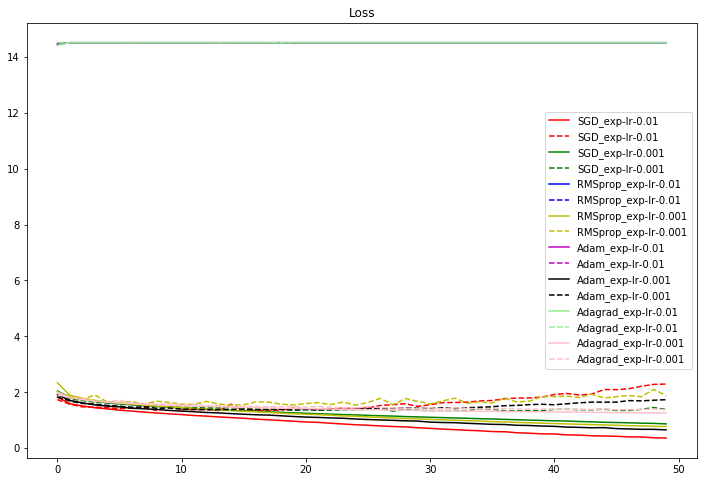

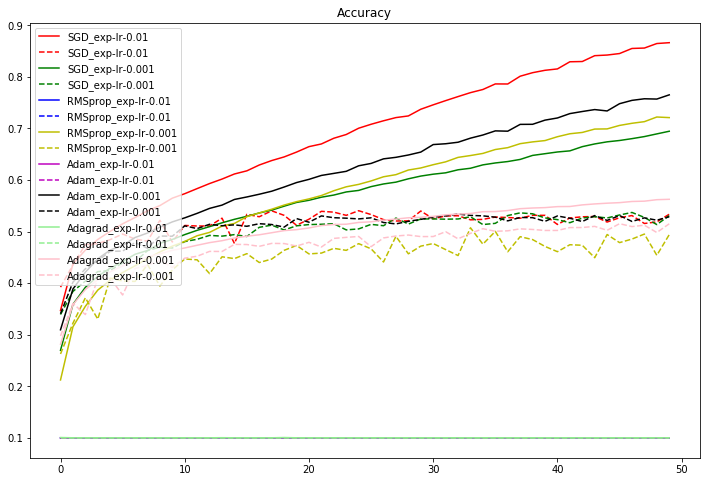

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "lightgreen", "pink"]

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()